In [ ]:
import os
import torch
import model_prev as model
from peft import LoraConfig, get_peft_model
from PIL import Image
from transformers import CLIPProcessor, T5Tokenizer


In [2]:
# Function to load model checkpoint
def load_model_checkpoint(model, checkpoint_path):
    state_dict = torch.load(checkpoint_path)
    model.load_state_dict(state_dict)
    print(f"Model loaded from {checkpoint_path}")

In [ ]:
model_name = "google/flan-t5-base"
integrated_model = model.IntegratedModel(model_name)
lora_config = LoraConfig(
    r=8,  # Rank
    lora_alpha=32,
    target_modules=["q", "v", "wi_0", "wi_1"],
    lora_dropout=0.05,
    bias="none",
)
integrated_model.decoder = get_peft_model(integrated_model.decoder, lora_config)

checkpoint_dir = '/home/ray/workspace/tw/output/integrated_model-small_split-20240519-160302/checkpoint-500'
checkpoint_path = os.path.join(checkpoint_dir, "pytorch_model.bin")
load_model_checkpoint(integrated_model, checkpoint_path)

In [4]:
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

[Result ] a man's hand holding a cigarette


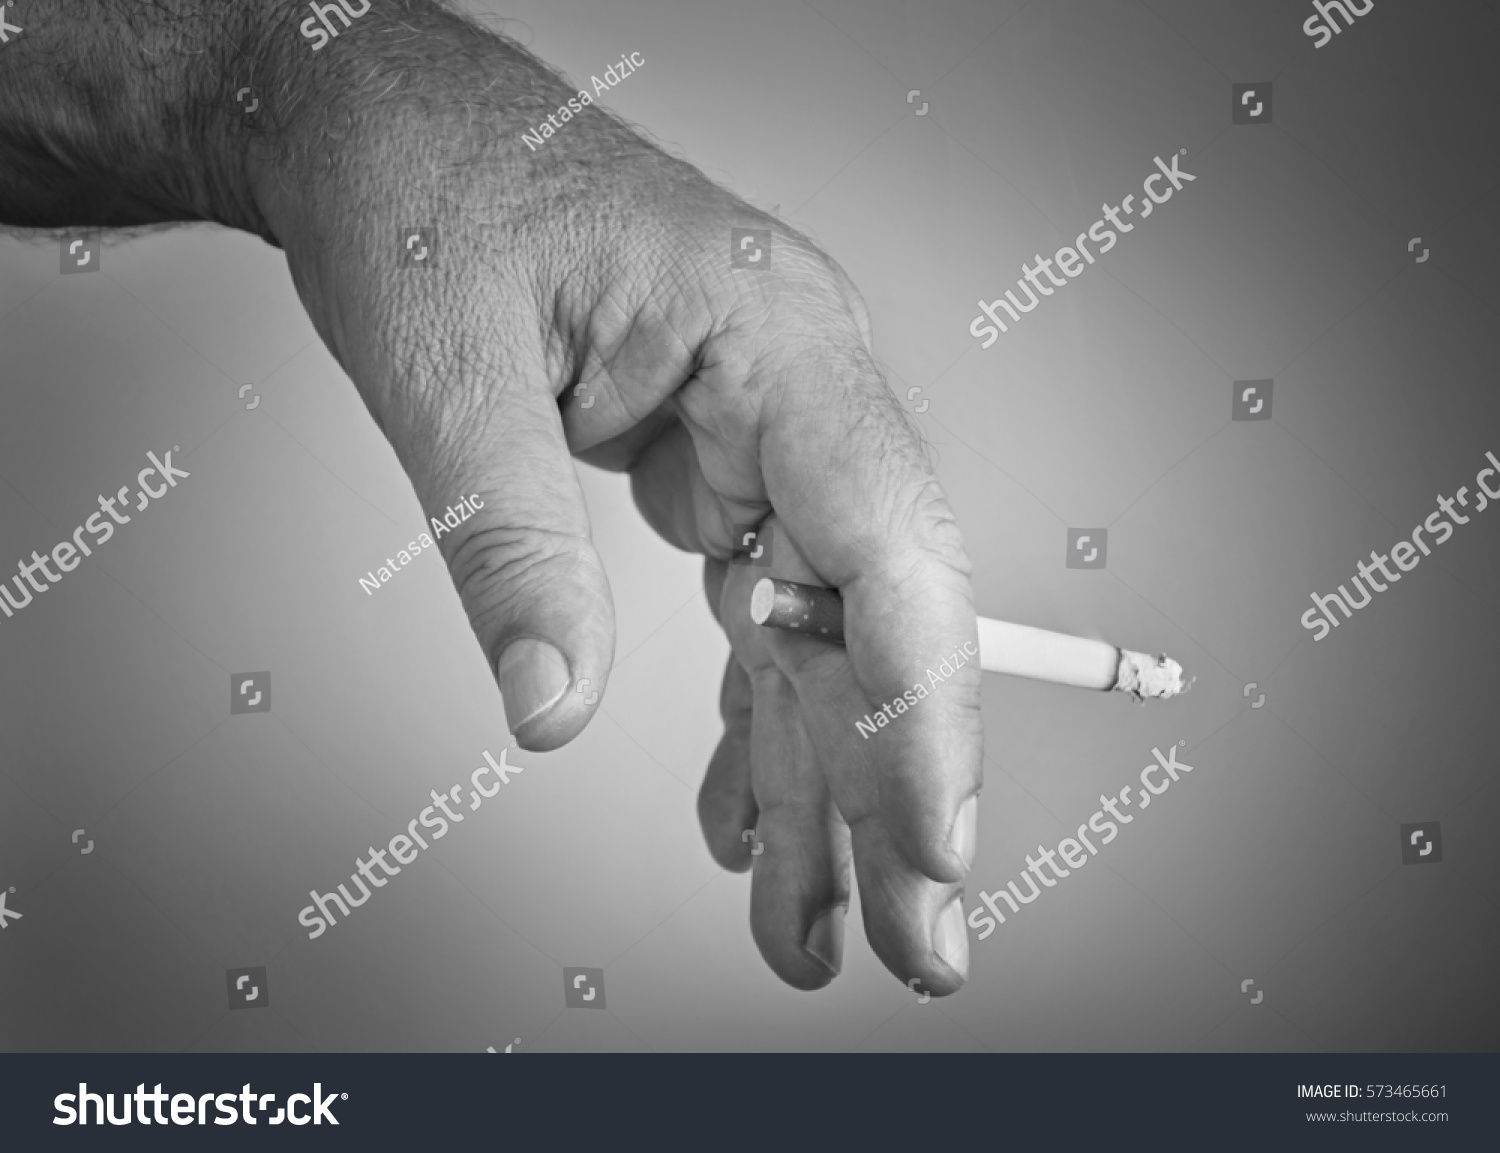

In [5]:
image = Image.open(f"sample_images/1.jpg")
processed_image = processor(images=image, return_tensors="pt")["pixel_values"]
output_tokens, encoder_outputs = integrated_model.generate(processed_image)
output = integrated_model.tokenizer.decode(output_tokens[0], skip_special_tokens=True)
print("[Result ]", output)
image

[Result ] a sand castle on the beach


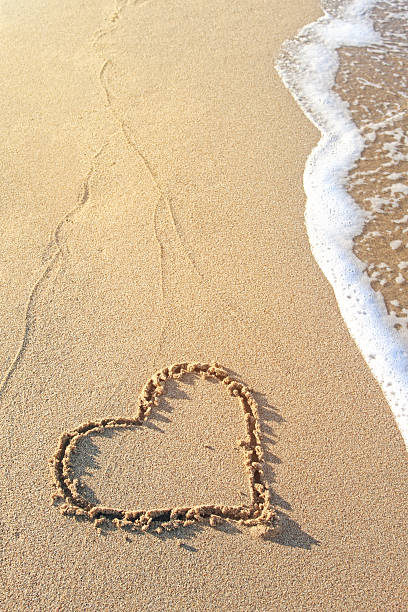

In [6]:
image = Image.open(f"sample_images/2.jpg")
processed_image = processor(images=image, return_tensors="pt")["pixel_values"]
output_tokens, encoder_outputs = integrated_model.generate(processed_image)
output = integrated_model.tokenizer.decode(output_tokens[0], skip_special_tokens=True)
print("[Result ]", output)
image

[Result ] a man's hand in the water


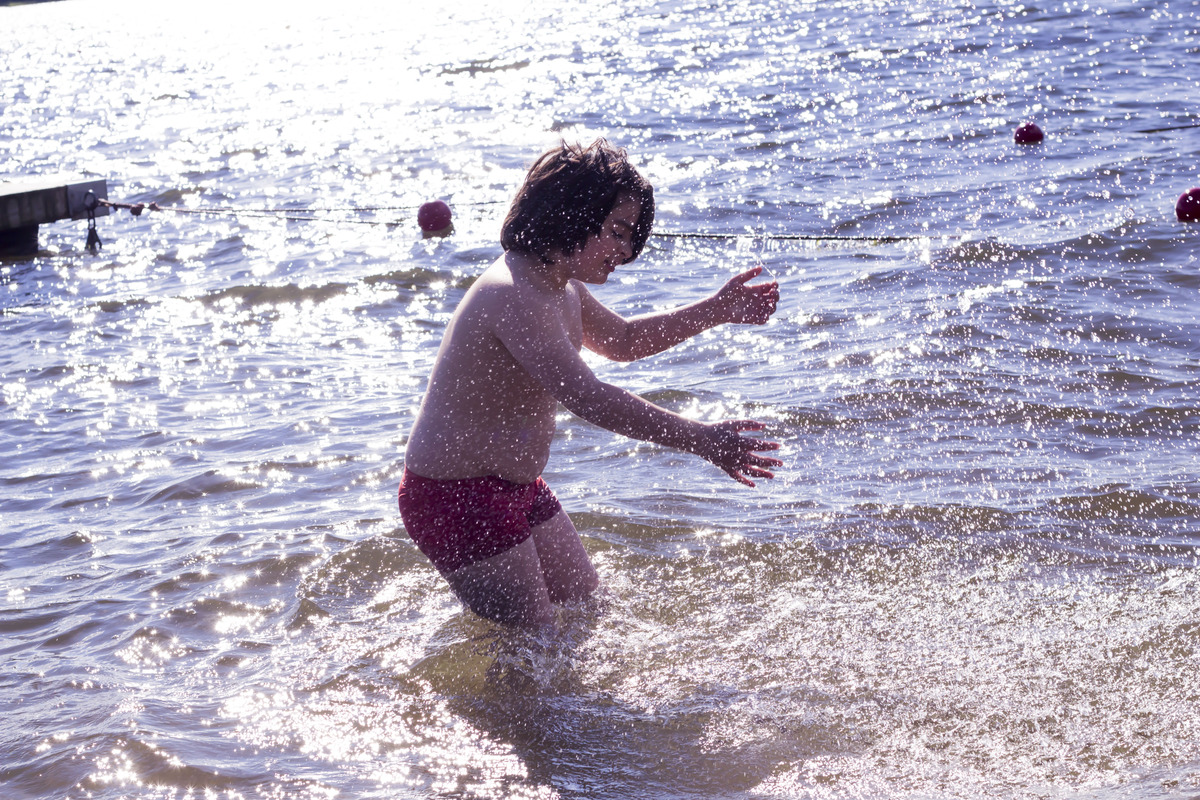

In [7]:
image = Image.open(f"sample_images/3.jpg")
processed_image = processor(images=image, return_tensors="pt")["pixel_values"]
output_tokens, encoder_outputs = integrated_model.generate(processed_image)
output = integrated_model.tokenizer.decode(output_tokens[0], skip_special_tokens=True)
print("[Result ]", output)
image